In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
import pandas as pd
%store -r grid

In [2]:
def train_data():
    X_train = pd.read_pickle('../Feature generation/data-X_train.pkl.bz2', compression='bz2')
    y_train = pd.read_pickle('../Feature generation/data-y_train.pkl.bz2', compression='bz2')
    X_test  = pd.read_pickle('../Feature generation/data-X_test.pkl.bz2', compression='bz2')
    y_test  = pd.read_pickle('../Feature generation/data-y_test.pkl.bz2', compression='bz2')

    return X_train, X_test, y_train, y_test

## Visualizing Random Forest

### Feature importance based on mean decrease in impurity

/tmp/ipykernel_3898/1238682456.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


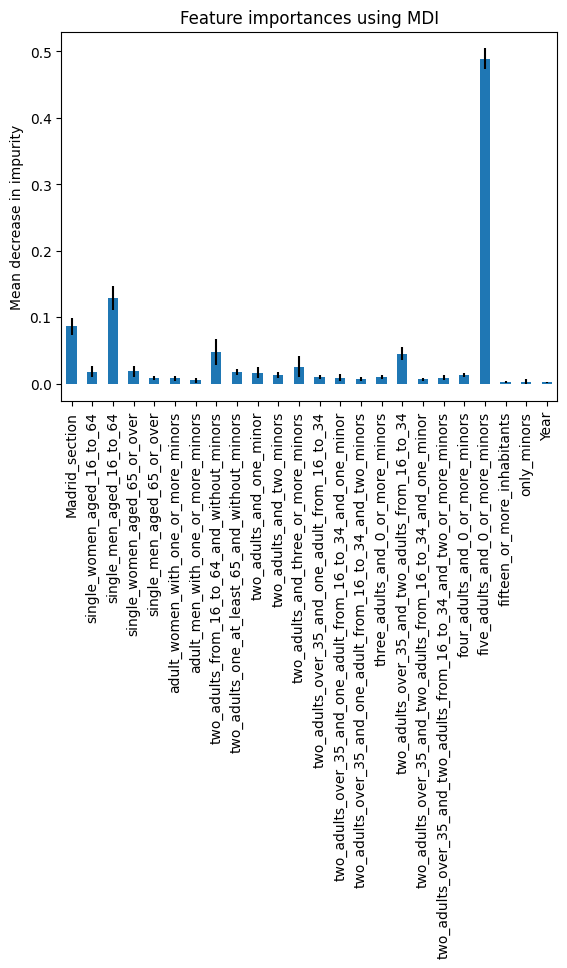

In [3]:
X_train, X_test, y_train, y_test = train_data()
best_model = grid.best_estimator_
importances = best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Feature importance based on feature permutation

/tmp/ipykernel_3898/1858574711.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


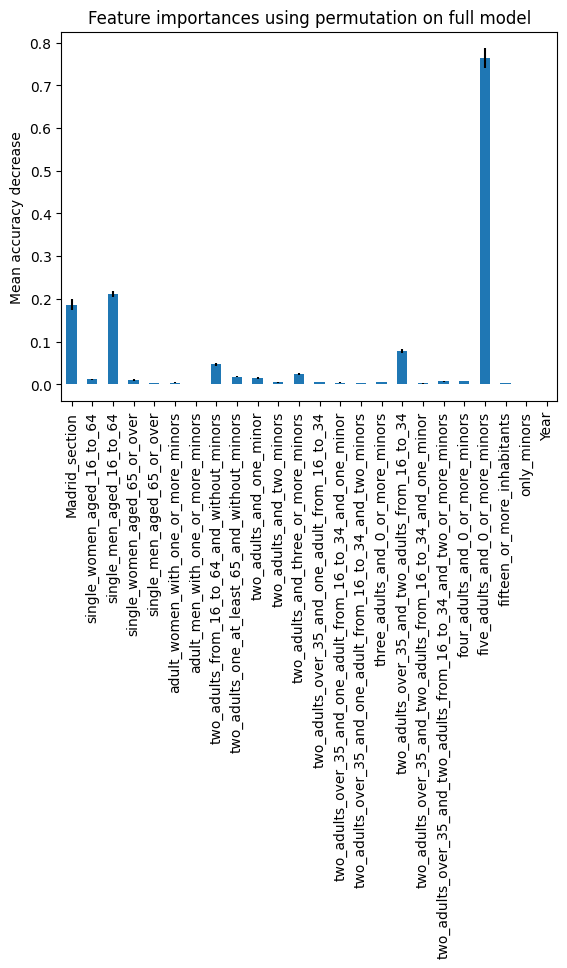

In [4]:
result = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()